In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df =  data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
def get(col):
  for i in col:
      print(i, str(data[i].unique()) +" "+ str(data[i].nunique()))



col = ['Pclass', 'SibSp', 'Parch', 'Embarked']

get(col)

Pclass [3 1 2] 3
SibSp [1 0 3 4 2 5 8] 7
Parch [0 1 2 5 3 4 6] 7
Embarked ['S' 'C' 'Q' nan] 3


In [19]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [14]:
df = df.dropna(subset=['Embarked'])

In [17]:
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"The range of the Age column is from {min_age} to {max_age}.")

The range of the Age column is from 0.42 to 80.0.


In [18]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [20]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


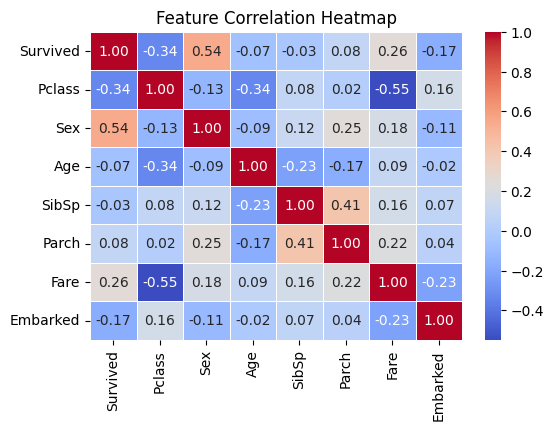

Correlation of each feature with Survived:
Survived    1.000000
Sex         0.541585
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.069822
Embarked   -0.169718
Pclass     -0.335549
Name: Survived, dtype: float64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Optional: check correlation with target
corr_with_target = corr_matrix['Survived'].sort_values(ascending=False)
print("Correlation of each feature with Survived:")
print(corr_with_target)


In [45]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
'''
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#model = model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

SyntaxError: incomplete input (ipython-input-2112928664.py, line 1)

In [48]:
'''
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5, scoring='f1').mean()


SyntaxError: incomplete input (ipython-input-11395050.py, line 1)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rf_clf = model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


voting_clf = VotingClassifier(estimators=[
    ('log', log_clf),
    ('rf', rf_clf)
], voting='soft')

voting_clf.fit(x_train, y_train)
print("Hybrid model accuracy:", voting_clf.score(x_test, y_test))


Hybrid model accuracy: 0.8314606741573034


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:38:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
df['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.617548
1,0.382452


In [55]:
test_data = pd.read_csv('test.csv')

In [56]:
# Apply the same preprocessing steps to test_df as applied to df
test_df = test_data.copy()
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing Age and Fare values using the median from the training data
test_df['Age'].fillna(df['Age'].median(), inplace=True)
test_df['Fare'].fillna(df['Fare'].median(), inplace=True) # Handle potential missing fare in test set

# Encode 'Sex' and 'Embarked' using the same mappings/encoder as the training data
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})
# Check if 'Embarked' column exists and has values before encoding
if 'Embarked' in test_df.columns and test_df['Embarked'].notna().any():
  test_df['Embarked'] = le.transform(test_df['Embarked'])
elif 'Embarked' in test_df.columns:
  # Handle case where Embarked column exists but is all NaN in test_df
  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
  test_df['Embarked'] = le.transform(test_df['Embarked'])


# Now predict with the preprocessed test_df
test_pred =  voting_clf.predict(test_df)

print("Test predictions generated successfully.")

Test predictions generated successfully.


/tmp/ipython-input-1930186995.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1930186995.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [57]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_pred
})

# 3️⃣ Sort by PassengerId (very important)
submission = submission.sort_values('PassengerId')

# 4️⃣ Save to CSV
submission.to_csv('submission.csv', index=False)

print("✅ Final submission file created and sorted by PassengerId!")

✅ Final submission file created and sorted by PassengerId!


In [60]:
submission.shape

(418, 2)